# Домашнее задание к лекции «Оценка точности модели, переобучение, регуляризация»

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
X = data[data.columns[:-1]]
X.head(2)

Y = data['affair']
model = LogisticRegression()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [7]:
model.fit(X_train, Y_train)

LogisticRegression()

## Задание 1

#### Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

In [9]:
# Считаю tpr и fpr с разным порогом вручную

def calculate(thres):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative

    predictions = model.predict_proba( X_test )
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= thres:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp, fp, fn, tn

steps = np.linspace(0, 1, 110)

tpr_list = []
fpr_list = []

for thres in steps:
    tp, fp, fn, tn = calculate(thres)
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

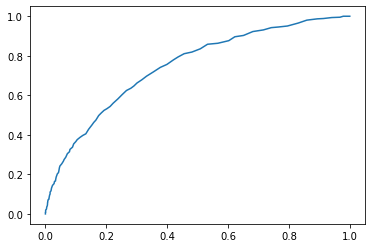

In [10]:
# Строю ROC-кривую

plt.plot(fpr_list, tpr_list)

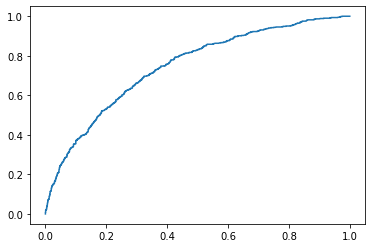

In [12]:
# Для сравнения строю ROC-кривую штатными методами
from sklearn.metrics import roc_curve

predictions = model.predict_proba( X_test )
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

plt.plot(fpr, tpr)

###### Кривые совпадают

## Задание 2

#### Построить график Precision - Recall на этих же данных

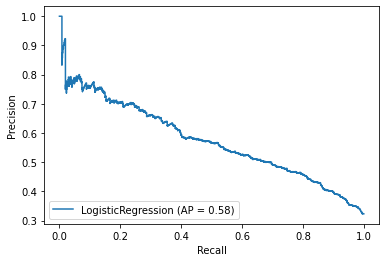

In [13]:
# Способ 1

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, X_test, Y_test)

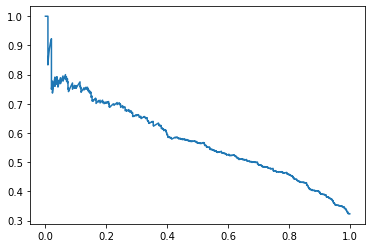

In [14]:
# Способ 2

from sklearn.metrics import precision_recall_curve
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

plt.plot(re, pr)